In [174]:
import pandas as pd
import numpy as np

In [175]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [176]:
data=pd.read_csv("Loan_data.csv")

In [177]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [179]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### checking for numerical and categorical columns in given data set

In [180]:
cols=data.columns

In [181]:
num_cols=data._get_numeric_data().columns

In [182]:
print(color.BOLD+"the numerical columns"+color.END)
for x in num_cols:
    print(x)

the numerical columns
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


In [183]:
cat_cols=set(cols)-set(num_cols)

In [184]:
print(color.BOLD+"catgorical columns of  the datasets are"+color.END)
for x in cat_cols:
    print(x)
    

catgorical columns of  the datasets are
Self_Employed
Gender
Education
Loan_Status
Married
Property_Area
Dependents
Loan_ID


### checking the columns with null values

In [185]:
print(color.BOLD+"The columns that have null value"+color.END)
for x in data.columns:
    if data[x].isnull().sum()>1:
        print(x)

The columns that have null value
Gender
Married
Dependents
Self_Employed
LoanAmount
Loan_Amount_Term
Credit_History


In [186]:
print(color.BOLD+"the numerical columns that have null value"+color.END)
for x in num_cols:
    if data[x].isnull().sum()>1:
        print(x)

the numerical columns that have null value
LoanAmount
Loan_Amount_Term
Credit_History


In [187]:


print(color.BOLD+"The categorical columns that have null value"+color.END)
for x in cat_cols:
    if data[x].isnull().sum()>1:
        print(x)
        

The categorical columns that have null value
Self_Employed
Gender
Married
Dependents


In [188]:
print(color.BOLD+"the numerical columns percentage of total null value"+color.END)
for x in num_cols:
    if data[x].isnull().sum()>1:
        print(data[x].isnull().sum()/len(data[x])*100)

the numerical columns percentage of total null value
3.5830618892508146
2.2801302931596092
8.143322475570033


In [189]:
print(color.BOLD+"the categorical columns percentage of total null value"+color.END)
for x in cat_cols:
    if data[x].isnull().sum()>1:
        print(data[x].isnull().sum()/len(data[x])*100)

the categorical columns percentage of total null value
5.211726384364821
2.1172638436482085
0.4885993485342019
2.44299674267101


# univarent analysis

### histogram(distribution of numerical value)

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 <BarContainer object of 10 artists>)

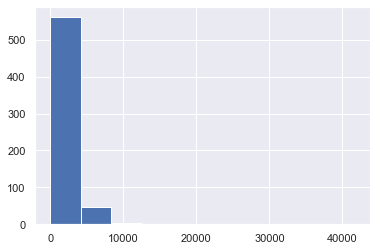

In [191]:
plt.hist(data['CoapplicantIncome'])

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

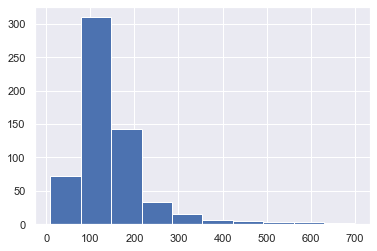

In [192]:
plt.hist(data['LoanAmount'])

### violin plot

C:\Users\Papun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

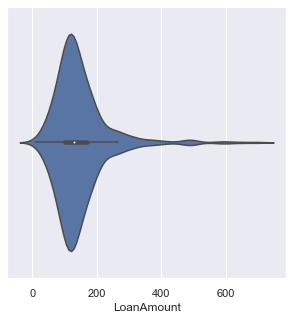

In [226]:
import seaborn as sns
sns.set(rc={"figure.figsize":(5,5)})
sns.violinplot(data1["LoanAmount"],orient="horizental")

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

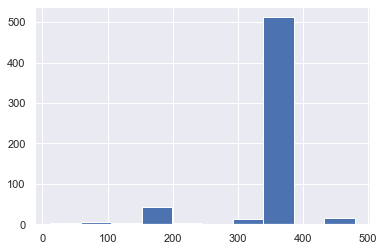

In [193]:
plt.hist(data['Loan_Amount_Term'])

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

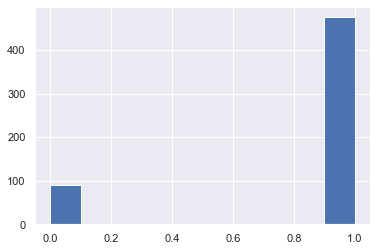

In [194]:
plt.hist(data['Credit_History'])

### swarmplot(distribution of continuous numerical varibale)

C:\Users\Papun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Credit_History'>

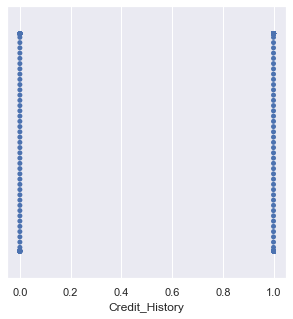

In [195]:
import seaborn as sns
sns.set(rc={"figure.figsize":(5,5)})
sns.swarmplot(x=data["Credit_History"])

C:\Users\Papun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

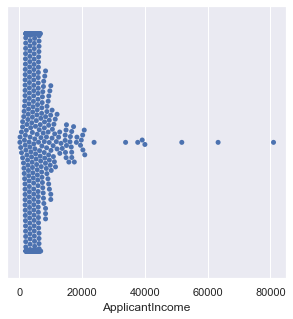

In [196]:
sns.set(rc={"figure.figsize":(5,5)})
sns.swarmplot(x=data["ApplicantIncome"])

C:\Users\Papun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='CoapplicantIncome'>

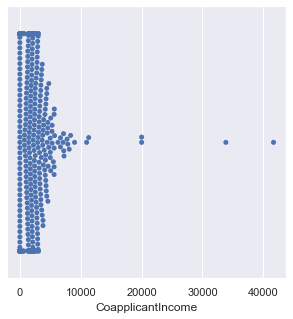

In [197]:
sns.set(rc={"figure.figsize":(5,5)})
sns.swarmplot(x=data["CoapplicantIncome"])

C:\Users\Papun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='LoanAmount'>

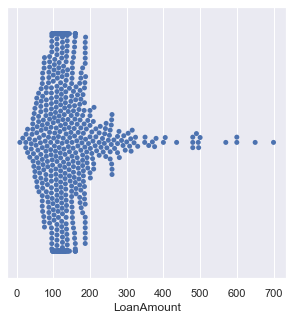

In [198]:
sns.set(rc={"figure.figsize":(5,5)})
sns.swarmplot(x=data["LoanAmount"])

C:\Users\Papun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Loan_Amount_Term'>

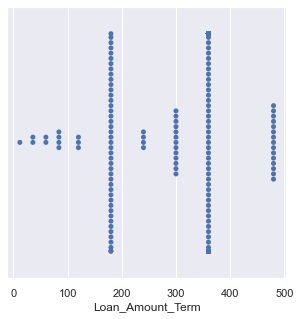

In [199]:
sns.set(rc={"figure.figsize":(5,5)})
sns.swarmplot(x=data['Loan_Amount_Term'])

In [200]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### probabilty distribution(continuos random variable)

<AxesSubplot:ylabel='Density'>

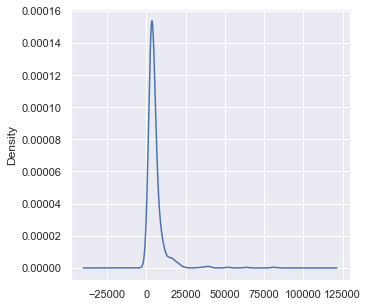

In [201]:
plt.figure(figsize=(5,5))
data['ApplicantIncome'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

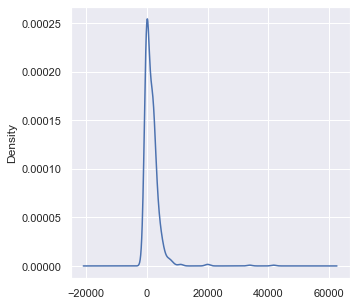

In [202]:
plt.figure(figsize=(5,5))
data['CoapplicantIncome'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

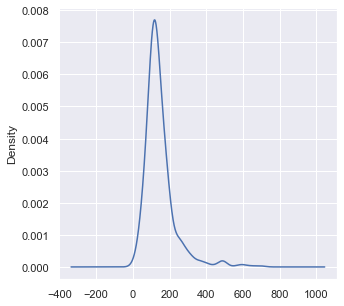

In [203]:
plt.figure(figsize=(5,5))
data['LoanAmount'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

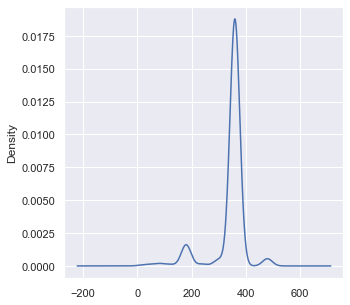

In [204]:
plt.figure(figsize=(5,5))
data['Loan_Amount_Term'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

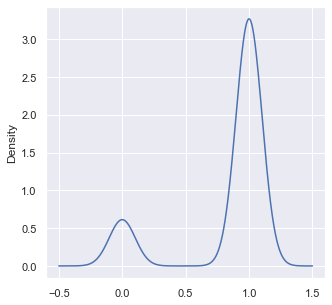

In [205]:
plt.figure(figsize=(5,5))
data['Credit_History'].plot(kind='density')

In [206]:
cat=list(cat_cols)

In [207]:
data1=data.drop(cat,axis=1)

In [208]:
data1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


### box plot(checking outlier,mean,median and percentile)

<AxesSubplot:xlabel='variable', ylabel='value'>

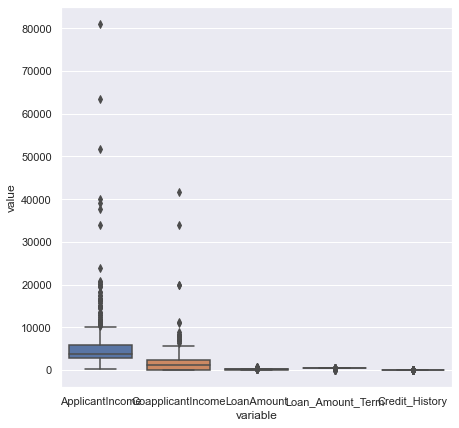

In [209]:
import seaborn as sns
sns.set(rc={"figure.figsize":(7,7)})
sns.boxplot(x="variable",y="value",data=pd.melt(data1))

<AxesSubplot:xlabel='variable', ylabel='value'>

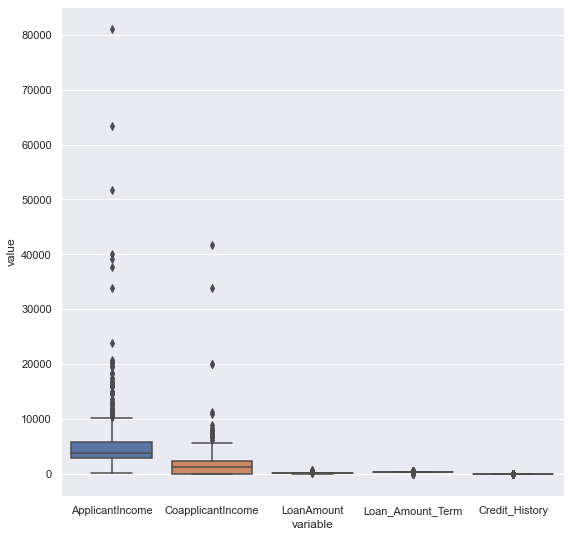

In [210]:
sns.set(rc={"figure.figsize":(9,9)})
sns.boxplot(x="variable",y="value",data=pd.melt(data1))

### distplot() :
1. The distplot() function of seaborn library was earlier mentioned under rug plot section. This function combines the matplotlib hist() function with the seaborn kdeplot() and rugplot() functions.

In [211]:
data1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [212]:
cat

['Self_Employed',
 'Gender',
 'Education',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Dependents',
 'Loan_ID']

In [213]:
cat_cols

{'Dependents',
 'Education',
 'Gender',
 'Loan_ID',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed'}

In [214]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Dependents'>

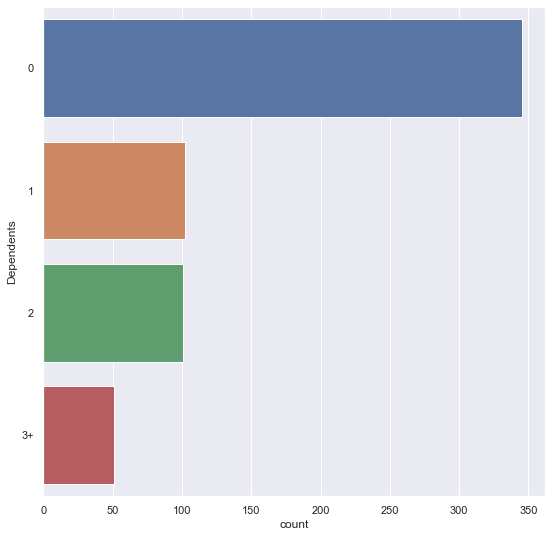

In [215]:
sns.countplot(y='Dependents',data=data)

<AxesSubplot:xlabel='count', ylabel='Education'>

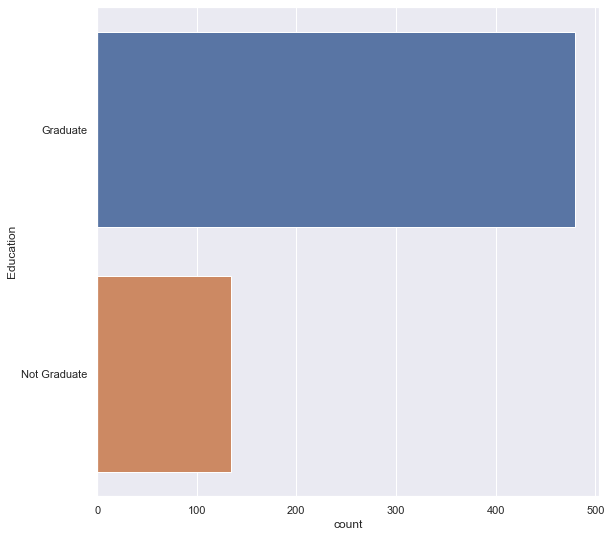

In [216]:
sns.countplot(y='Education',data=data)

<AxesSubplot:xlabel='count', ylabel='Gender'>

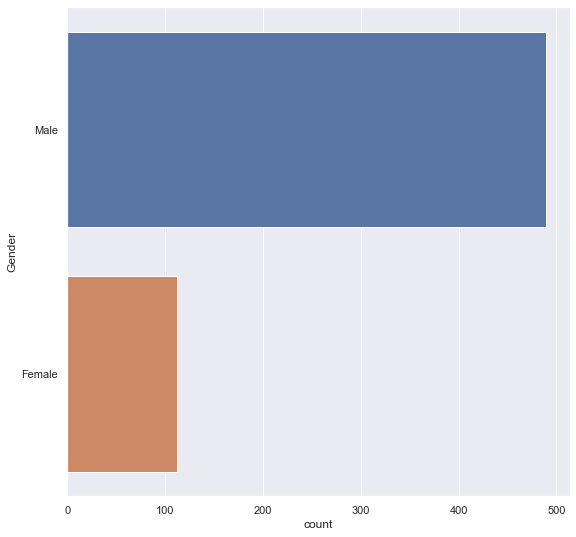

In [217]:
sns.countplot(y='Gender',data=data)

<AxesSubplot:xlabel='count', ylabel='Loan_Status'>

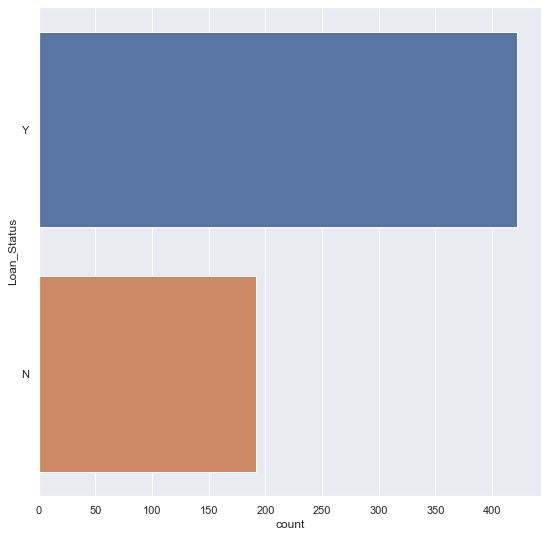

In [218]:
sns.countplot(y='Loan_Status',data=data)

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

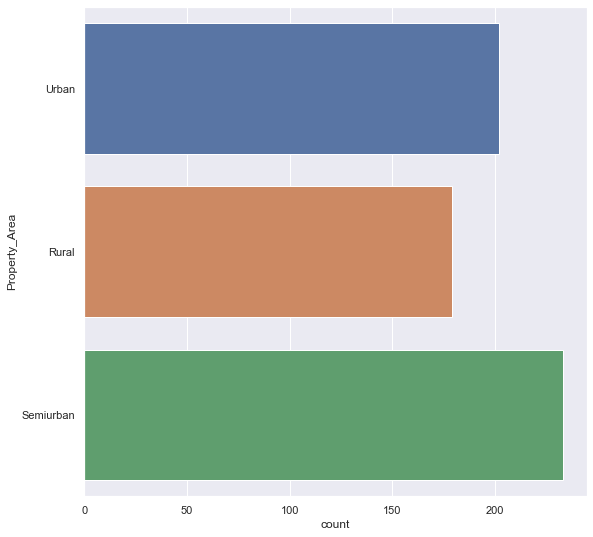

In [219]:
sns.countplot(y='Property_Area',data=data)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

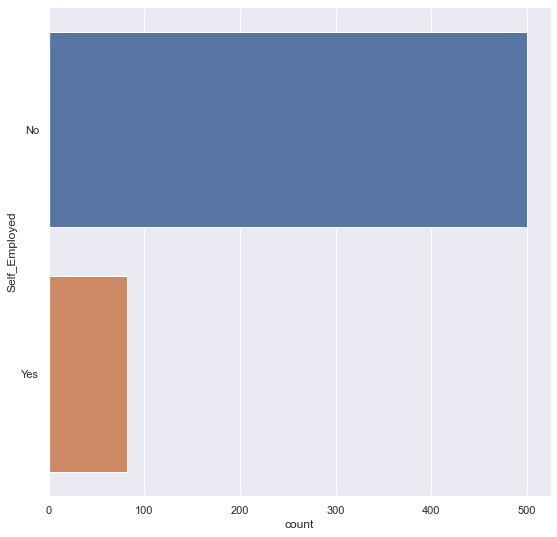

In [220]:
sns.countplot(y='Self_Employed',data=data)

In [221]:
data.set_index(['Loan_ID'])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


### bar chart

<AxesSubplot:>

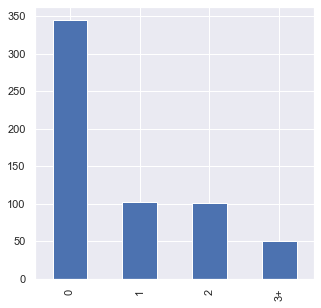

In [228]:

data["Dependents"].value_counts().plot.bar()

<AxesSubplot:>

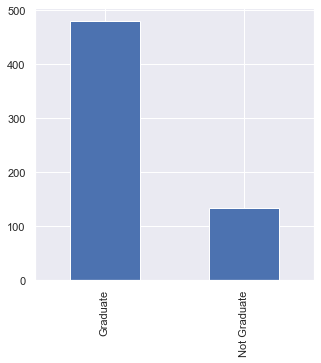

In [229]:

data['Education'].value_counts().plot.bar()

<AxesSubplot:>

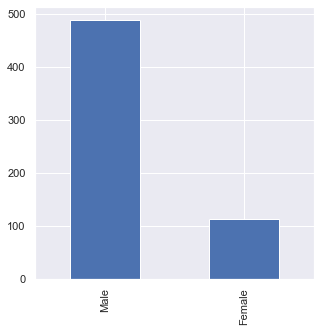

In [230]:

data['Gender'].value_counts().plot.bar()

<AxesSubplot:>

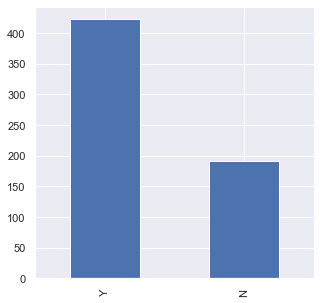

In [231]:

data['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:>

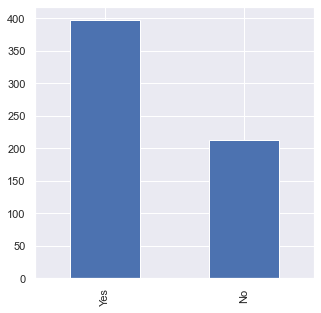

In [232]:

data['Married'].value_counts().plot.bar()

<AxesSubplot:>

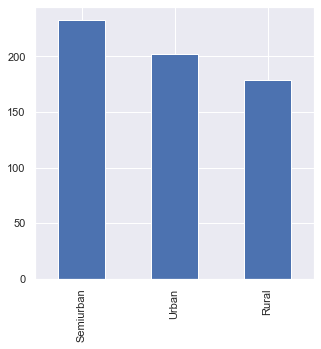

In [233]:

data['Property_Area'].value_counts().plot.bar()

<AxesSubplot:>

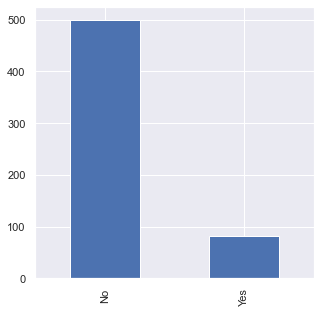

In [234]:

data['Self_Employed'].value_counts().plot.bar()

### pie chart

([<matplotlib.patches.Wedge at 0x1883eba5e80>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Urban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Rural'),
  Text(0.67000963198199, -0.8724030565348555, 'Semiurban')])

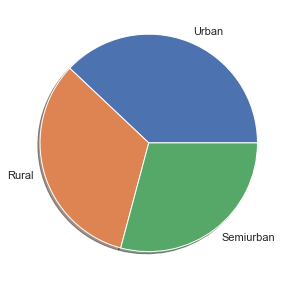

In [242]:
import matplotlib.pyplot as plt
plt.pie(data['Property_Area'].value_counts(),labels=data['Property_Area'].unique(),shadow=True)
